# Практика №3 
## Дослідження даних за допомогою бібліотеки pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Зчитайте файл players_20.csv

In [6]:
df_data = pd.read_csv('./players_20.csv')

### Виведіть перші 6 рядків об'єкту DataFrame

In [7]:
print(df_data.head(6))


   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   
5     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   
5       K. De Bruyne                      Kevin De Bruyne   28

### Отримайте розміри об'єкту DataFrame

In [11]:
print(df_data.shape)

(18278, 104)


### Отримайте список стовпців міток

In [73]:
print(list(df_data.columns))


['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

### Створіть список з переліком назв стовпців, які потім необхідно буде видалити

In [16]:
useless_columns = ['dob', 'sofifa_id', 'player_url', 'long_name', 'body_type', 'real_face', 'loaned_from', 'nation_position', 'nation_jersey_number']

### Видаліть вказані вище мітки стовпці і вивести перші 10 рядків

In [17]:
df_dropped = df_data.drop(columns=useless_columns, axis=1)

print(df_dropped.head(10))


          short_name  age  height_cm  weight_kg  nationality  \
0           L. Messi   32        170         72    Argentina   
1  Cristiano Ronaldo   34        187         83     Portugal   
2          Neymar Jr   27        175         68       Brazil   
3           J. Oblak   26        188         87     Slovenia   
4          E. Hazard   28        175         74      Belgium   
5       K. De Bruyne   28        181         70      Belgium   
6      M. ter Stegen   27        187         85      Germany   
7        V. van Dijk   27        193         92  Netherlands   
8          L. Modrić   33        172         66      Croatia   
9           M. Salah   27        175         71        Egypt   

                  club  overall  potential  value_eur  wage_eur  ...   lwb  \
0         FC Barcelona       94         94   95500000    565000  ...  68+2   
1             Juventus       93         93   58500000    405000  ...  65+3   
2  Paris Saint-Germain       92         92  105500000    2900

### Виведіть останні 5 рядків за стовпцем з міткою 'weight_kg'


In [72]:
print(df_data[['weight_kg']].tail(5))

       weight_kg
18273         79
18274         66
18275         75
18276         74
18277         78


### Виведіть перші 5 рядків за двома стовпцями з мітками 'short_name', 'weight_kg'


In [71]:
print(df_data[['short_name', 'weight_kg']].head(5))

          short_name  weight_kg
0           L. Messi         72
1  Cristiano Ronaldo         83
2          Neymar Jr         68
3           J. Oblak         87
4          E. Hazard         74


### Розрахуйте індекс маси тіла для кожного гравця і отримані дані мають бути додані до df_dropped за стовпцем з назвою мітки 'BMI'



In [33]:
df_data['height_m'] = df_data['height_cm'] / 100

df_data['BMI'] = df_data['weight_kg'] / (df_data['height_m'] ** 2)

df_dropped['BMI'] = df_data['BMI']

print(df_dropped.head())

          short_name  age  height_cm  weight_kg nationality  \
0           L. Messi   32        170         72   Argentina   
1  Cristiano Ronaldo   34        187         83    Portugal   
2          Neymar Jr   27        175         68      Brazil   
3           J. Oblak   26        188         87    Slovenia   
4          E. Hazard   28        175         74     Belgium   

                  club  overall  potential  value_eur  wage_eur  ...   ldm  \
0         FC Barcelona       94         94   95500000    565000  ...  66+2   
1             Juventus       93         93   58500000    405000  ...  61+3   
2  Paris Saint-Germain       92         92  105500000    290000  ...  61+3   
3      Atlético Madrid       91         93   77500000    125000  ...   NaN   
4          Real Madrid       91         91   90000000    470000  ...  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb        BMI  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  24.913495  
1  61+3  61+3  65+3  61+3 

### Вивести перші 10 рядків зі стовпцями з мітками 'short_name' і 'BMI'
 

In [35]:
print(df_dropped[["short_name", "BMI"]].head(10))

          short_name        BMI
0           L. Messi  24.913495
1  Cristiano Ronaldo  23.735308
2          Neymar Jr  22.204082
3           J. Oblak  24.615211
4          E. Hazard  24.163265
5       K. De Bruyne  21.366869
6      M. ter Stegen  24.307244
7        V. van Dijk  24.698650
8          L. Modrić  22.309356
9           M. Salah  23.183673


### Побудуйте гістограму роздподілу за індексом маси тіла

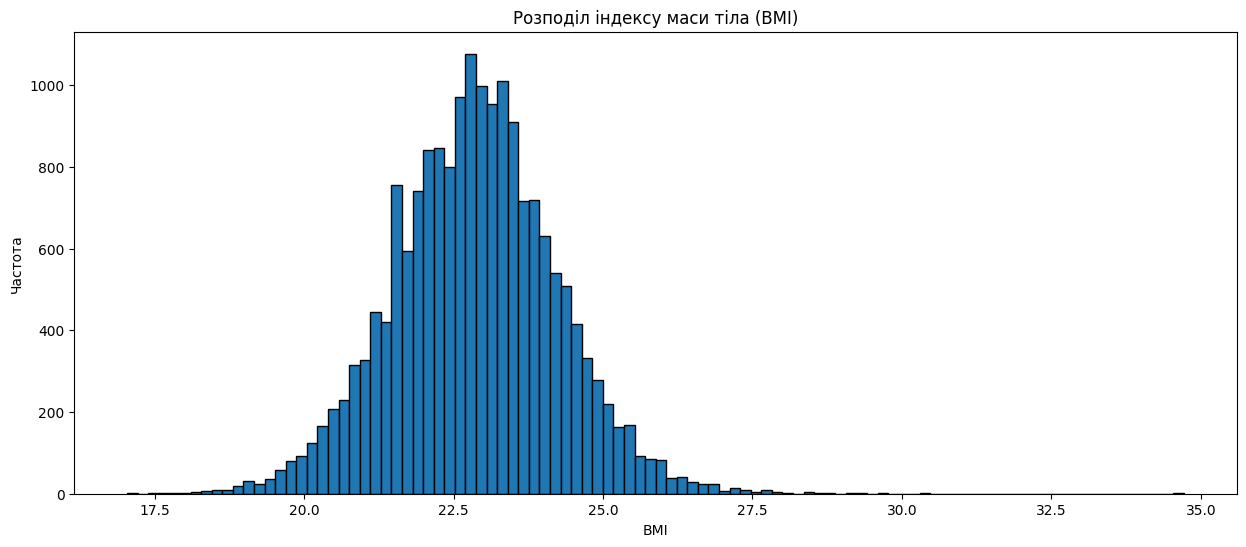

In [53]:
plt.figure(figsize=(15, 6))
plt.hist(df_dropped['BMI'], bins=100, edgecolor='black', alpha=1)
plt.title('Розподіл індексу маси тіла (BMI)')
plt.xlabel('BMI')
plt.ylabel('Частота')
plt.grid(False)
plt.show()

### Побудувати гістограму розподілу гравців за віком (стовпець 'age')

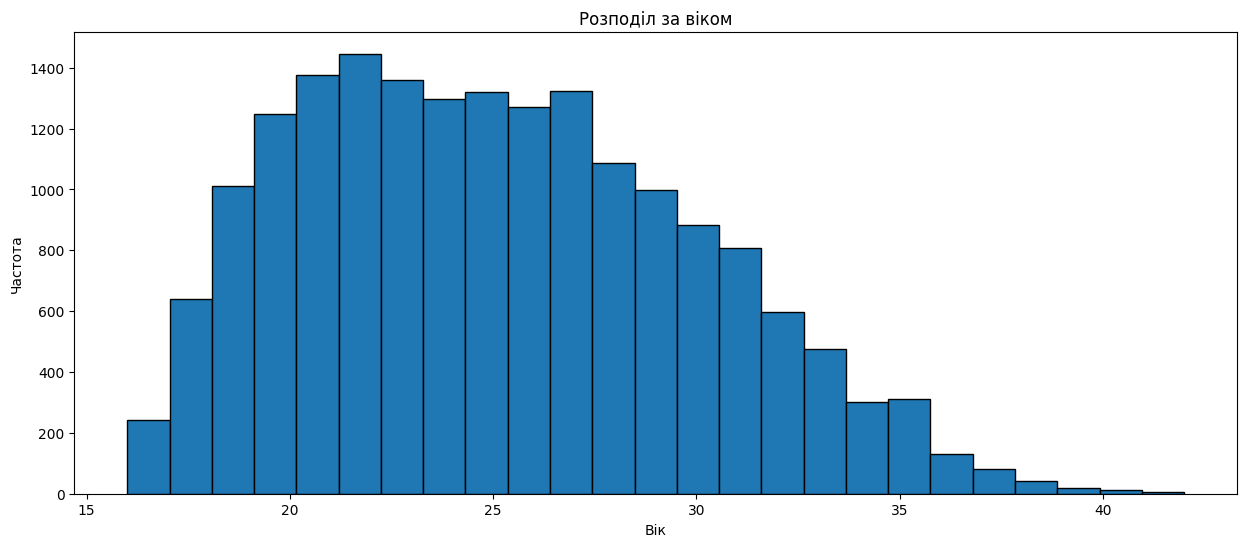

In [61]:
plt.figure(figsize=(15, 6))
plt.hist(df_dropped['age'], bins=25, edgecolor='black', alpha=1)
plt.title('Розподіл за віком')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.grid(False)
plt.show()

### Для гравців старше 30 років знайти середнє значення і медіану ваги (стовпець 'weight_kg). Вивести останні 10 гравців. 

In [70]:
players_over_30 = df_data[df_data['age'] > 30]

mean_weight = players_over_30['weight_kg'].mean()
median_weight = players_over_30['weight_kg'].median()

print(f"Середнє значення ваги для гравців старше 30 років: {mean_weight:.2f} кг")
print(f"Медіана ваги для гравців старше 30 років: {median_weight:.2f} кг")

print(players_over_30.tail(10))

Середнє значення ваги для гравців старше 30 років: 77.52 кг
Медіана ваги для гравців старше 30 років: 77.00 кг
       sofifa_id                                         player_url  \
17072     222117  https://sofifa.com/player/222117/jun-shen/20/1...   
17074     231669  https://sofifa.com/player/231669/anibal-mosque...   
17346     138083  https://sofifa.com/player/138083/nicky-hunt/20...   
17347     232539  https://sofifa.com/player/232539/kota-ogi/20/1...   
17581     231593  https://sofifa.com/player/231593/gareth-harkin...   
17582     242409  https://sofifa.com/player/242409/hui-jin/20/15...   
17778     224695  https://sofifa.com/player/224695/zhen-ge/20/15...   
17946      11430  https://sofifa.com/player/11430/jamie-mccombe/...   
17948     245558  https://sofifa.com/player/245558/gary-maley/20...   
18233     182461  https://sofifa.com/player/182461/ting-zhou/20/...   

        short_name        long_name  age         dob  height_cm  weight_kg  \
17072     Shen Jun           

### Отримайте кількість гравців за національність (стовпець 'nationality' і див. метод value_counts()). Далі відсортуйте у порядку спадання і виведіть перші 7 рядків.

In [69]:
print(df_data['nationality'].value_counts().head(7))

nationality
England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
Brazil        824
Italy         732
Name: count, dtype: int64
